This notebook sets up the workflow for the various functions we have implemented. It shows an example of how we clustered using Nonnegative Matrix Factorization. We manually inspect the output of NMF to determine the best number of clusters for each group

In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from utils.clean_up import *
from utils.categorize_demographics import *
from utils.nonnegative_matrix_factorization import nmf_inspect, nmf_labels

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
mpl.rc('savefig', dpi=200)
params = {'figure.dpi' : 200,
          'axes.axisbelow' : True,
          'lines.antialiased' : True}

for (k, v) in params.items():
    plt.rcParams[k] = v

In [3]:
essay_dict = {'essay0' : 'My self summary',
              'essay1' : 'What I\'m doing with my life',
              'essay2' : 'I\'m really good at',
              'essay3' : 'The first thing people notice about me',
              'essay4' : 'Favorite books, movies, tv, food',
              'essay5' : 'The six things I could never do without',
              'essay6' : 'I spend a lot of time thinking about',
              'essay7' : 'On a typical Friday night I am',
              'essay8' : 'The most private thing I am willing to admit',
              'essay9' : 'You should message me if'}

Getting the data, cleaning it, and categorizing demographic data

In [4]:
df = pd.read_csv('data/profiles.20120630.csv')

In [5]:
essay_list = ['essay0']
df_clean = clean_up(df, essay_list)

In [6]:
df_clean.shape

(52956, 32)

In [25]:
#df_clean.fillna('', inplace=True)

In [7]:
df_clean['religion'] = df_clean['religion'].apply(religion_categories)
df_clean['job'] = df_clean['job'].apply(job_categories)
df_clean['drugs'] = df_clean['drugs'].apply(drug_categories)
df_clean['diet'] = df_clean['diet'].apply(diet_categories)
df_clean['body_type'] = df_clean['body_type'].apply(body_categories)
df_clean['drinks'] = df_clean['drinks'].apply(drink_categories)
df_clean['sign'] = df_clean['sign'].apply(sign_categories)
df_clean['ethnicity'] = df_clean['ethnicity'].apply(ethnicity_categories)
df_clean['pets'] = df_clean['pets'].apply(pets_categories)
df_clean['speaks'] = df_clean['speaks'].apply(language_categories)

In [8]:
count_matrix, tfidf_matrix, vocab = col_to_data_matrix(df_clean, essay_list[0])

In [9]:
K = 25

In [14]:
nmf_inspect(tfidf_matrix, vocab, k_vals=[K], n_words=50)

25
Group 0:
i'm | i'm pretty | pretty | i'm looking | i'm really | guy | say i'm | i'm just | i'm trying | nerd | think i'm | life i'm | i'm open | shy | i'm working | ... i'm | i'm good | i'm bit | girl | laid | i'm interested | bit | i'm big | i'm happy | fan | i'm kind | time i'm | i'm going | sure | big | i'm passionate | i'm currently | that's | people i'm | usually | i'd | sarcastic | student | i'll | kind | geek | i'm originally | i'm sure | know i'm | happy | who's | things i'm | friends i'm | type | currently

Group 1:
san | francisco | san francisco | moved san | moved san francisco | city | living san | born | living | raised | born raised | moved | live | lived | native | grew | years | originally | currently | recently | home | year | recently moved | just moved | university | college | york | new york | offer | graduated | santa | working | chicago | hi | went | state | giants | exploring | moving | south | california | southern | enjoying | boston | explore | job | midwe

In [10]:
df_clean['group'] = nmf_labels(tfidf_matrix, k=K)

In [11]:
filename = '/Users/matar/Documents/Courses/ANLP/FinalProject/okcupid/data/df_clean_essay0.csv'
df_clean.to_csv(filename)

In [12]:
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821',
          '#D55E00', '#CC79A7', '#56B4E9', '#009E73',
          '#F0E442', '#0072B2']

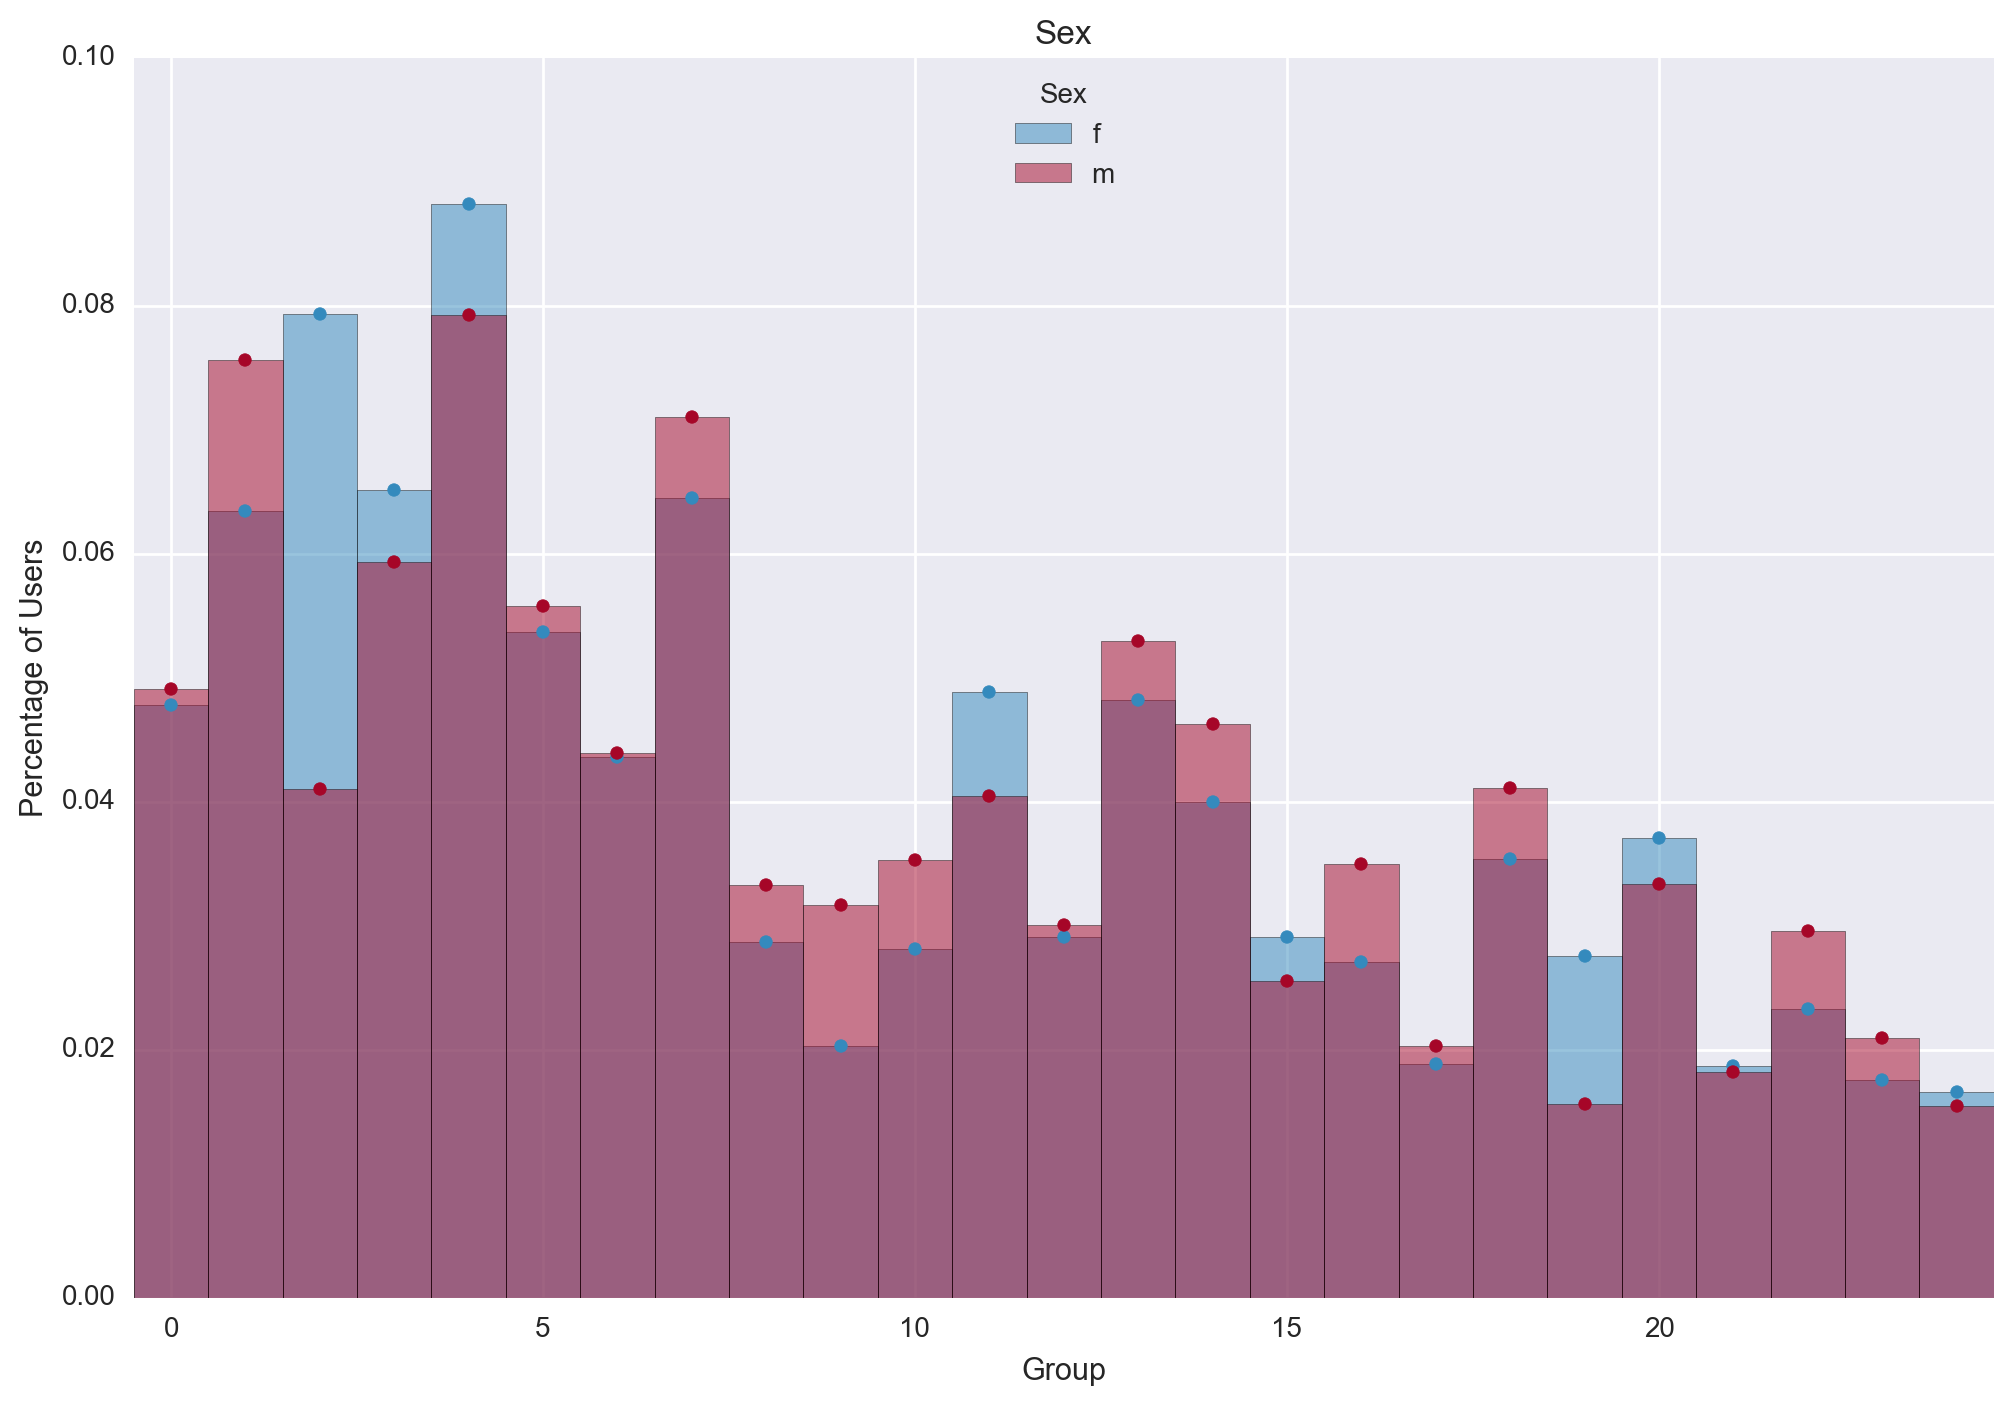

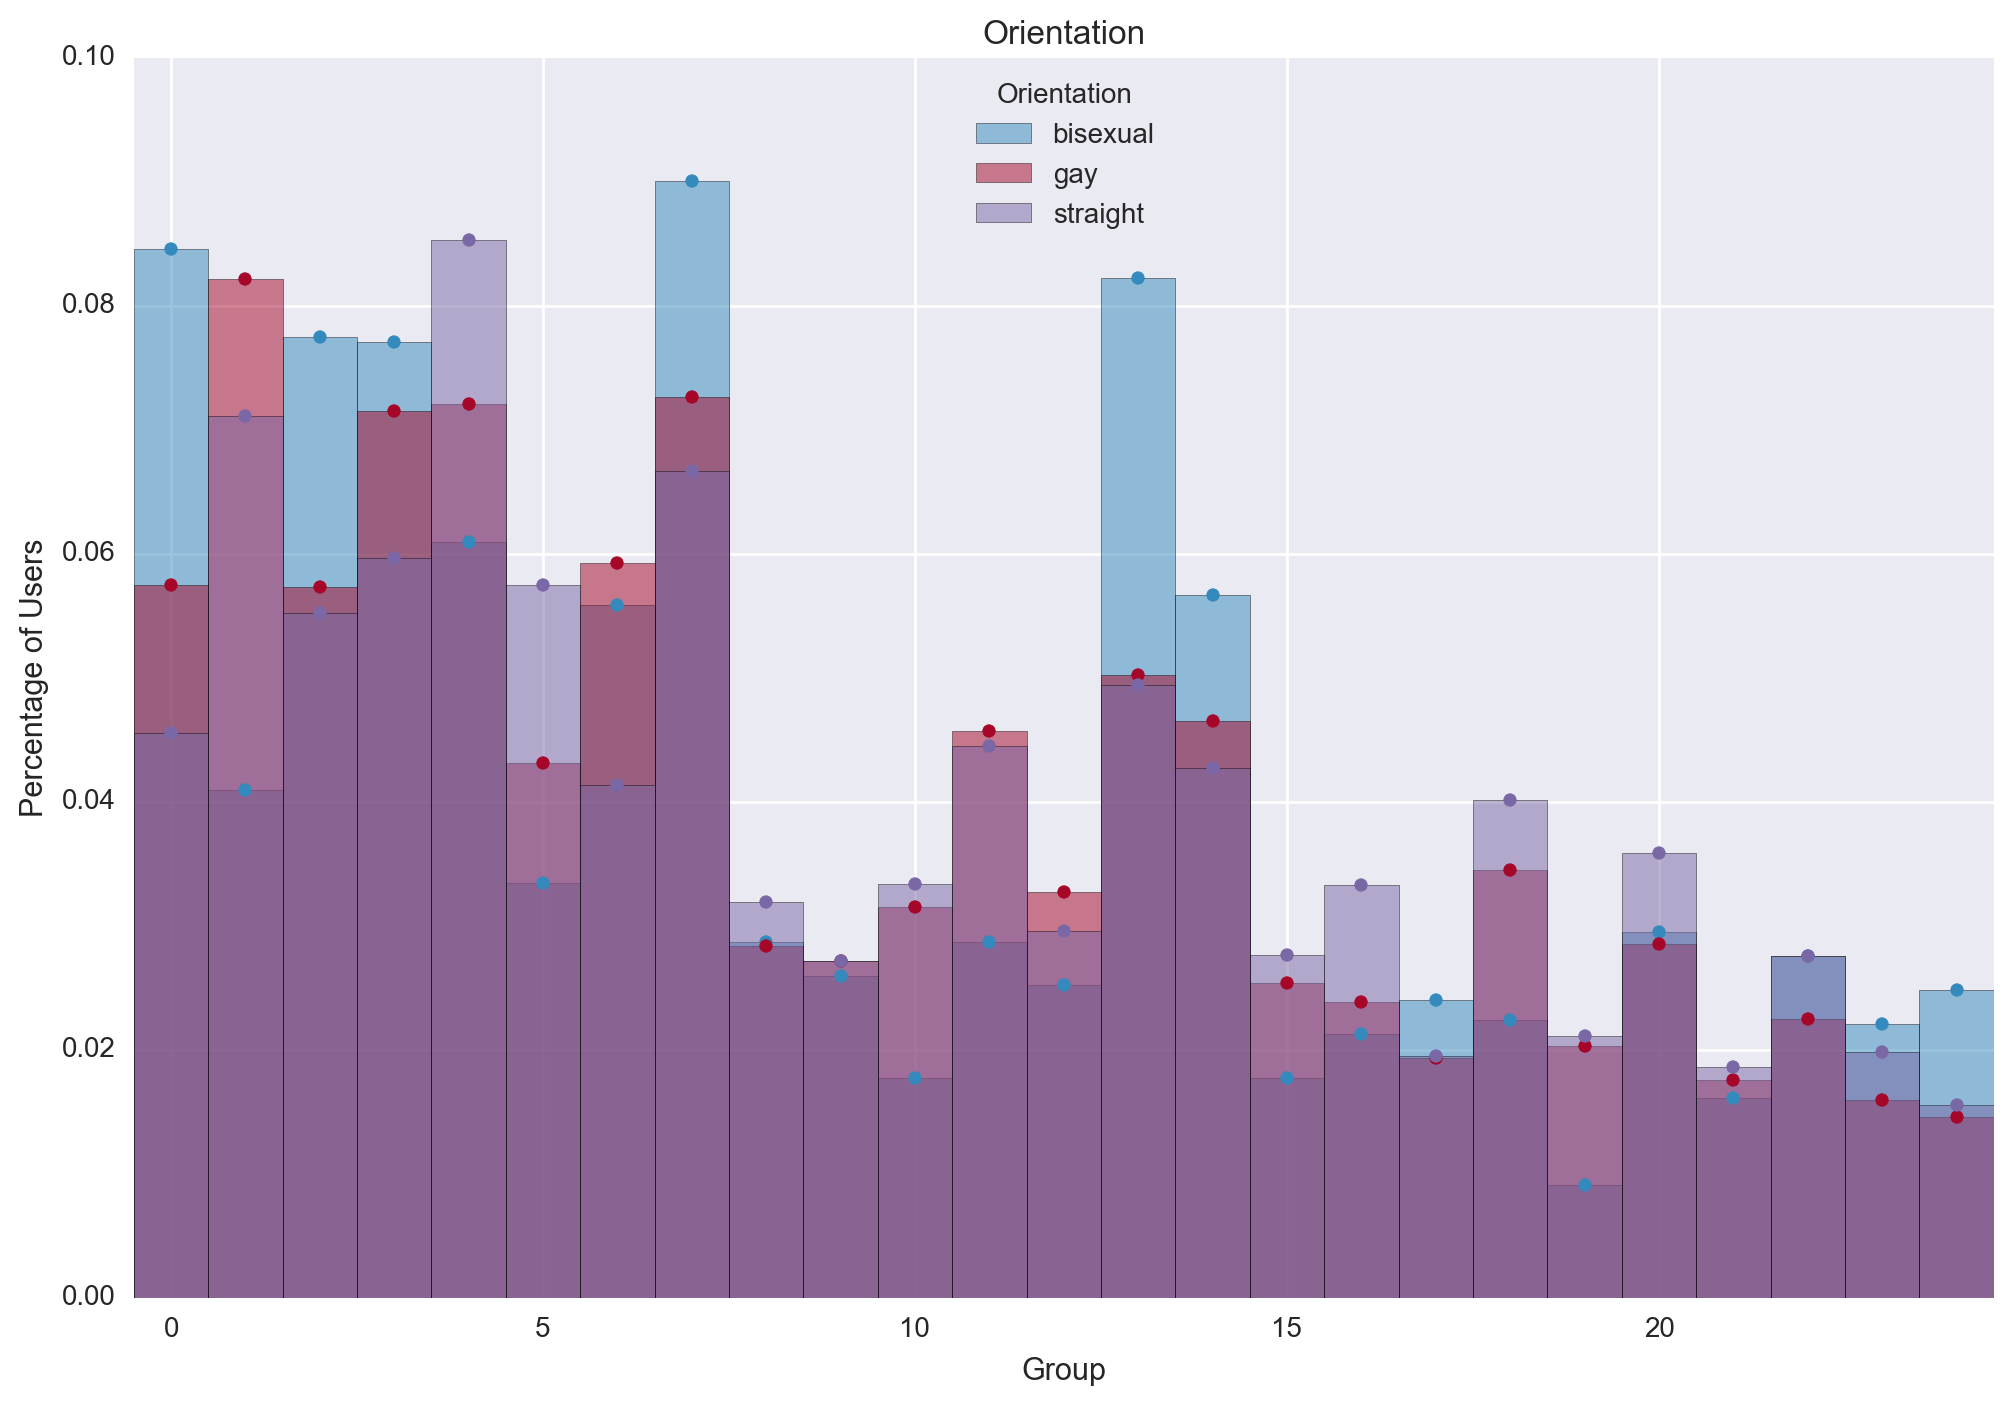

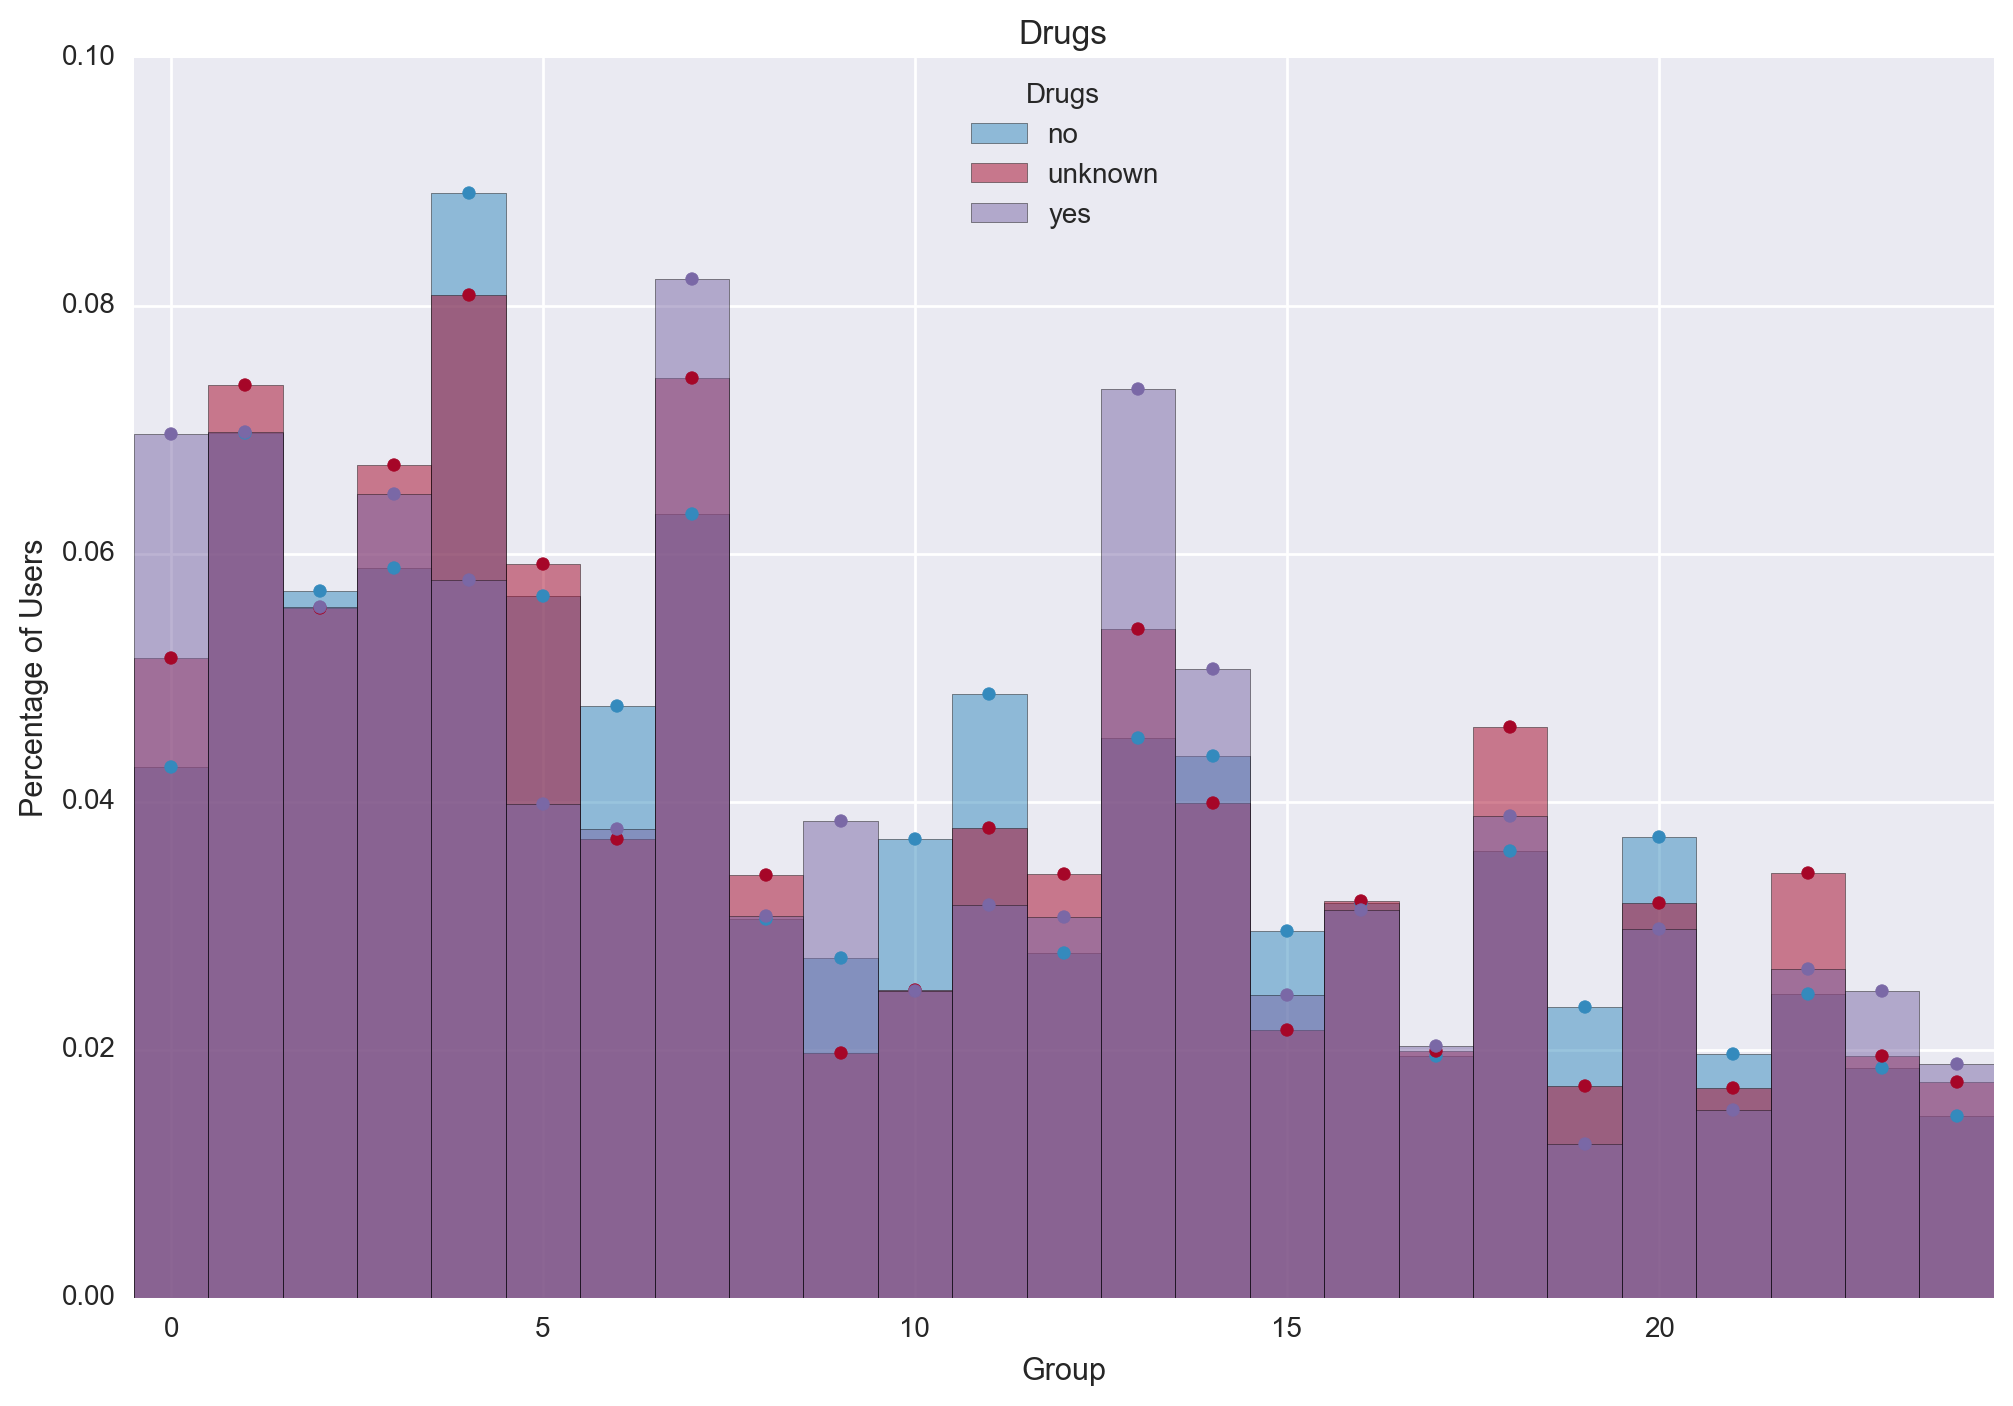

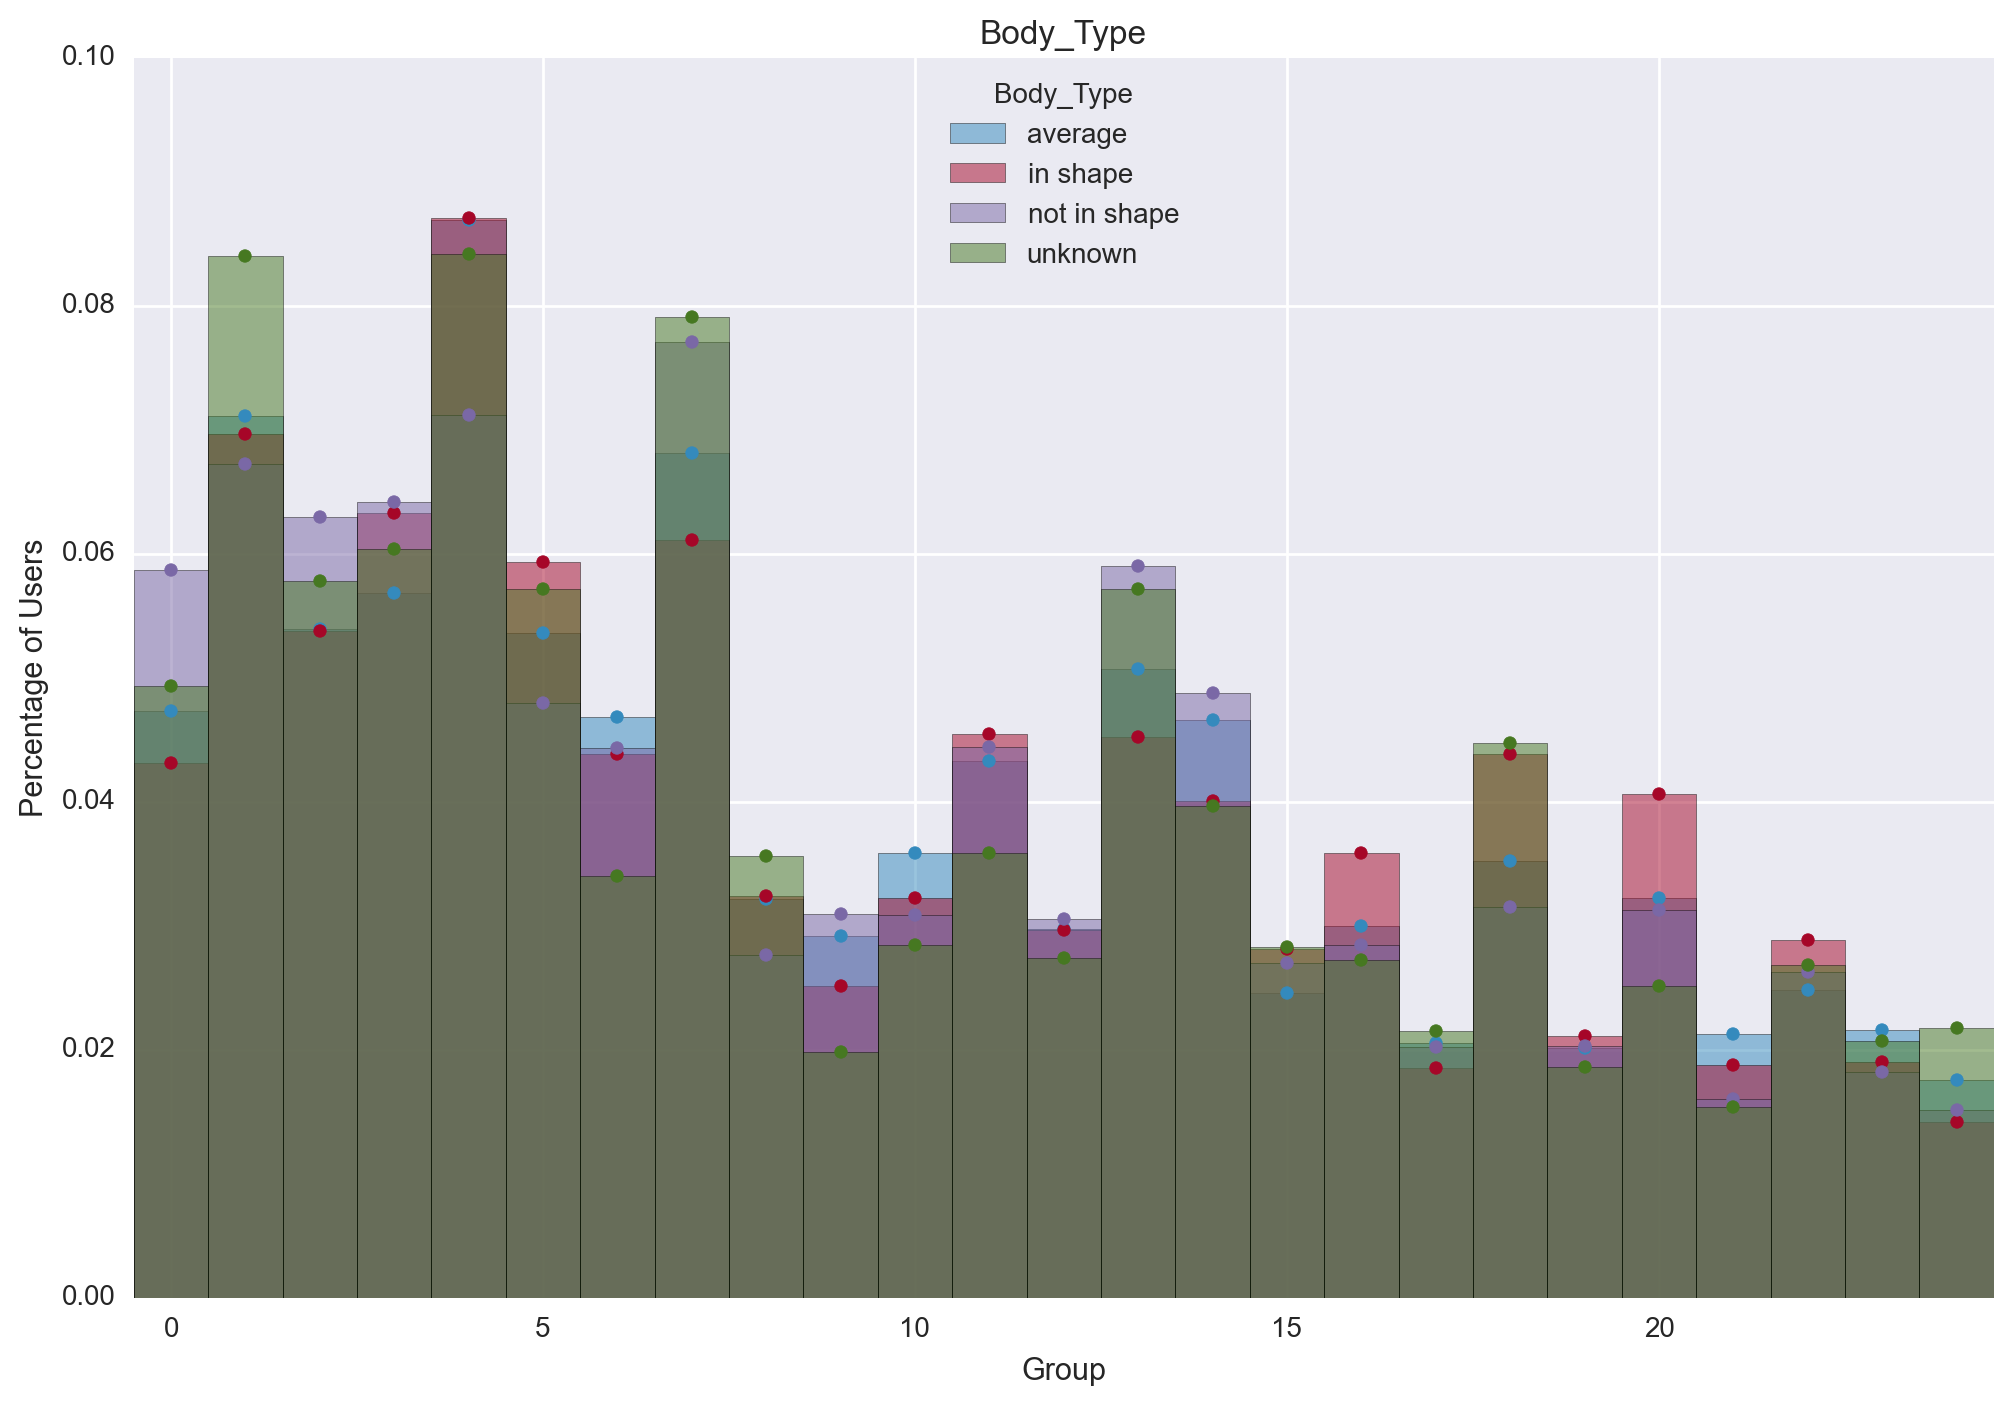

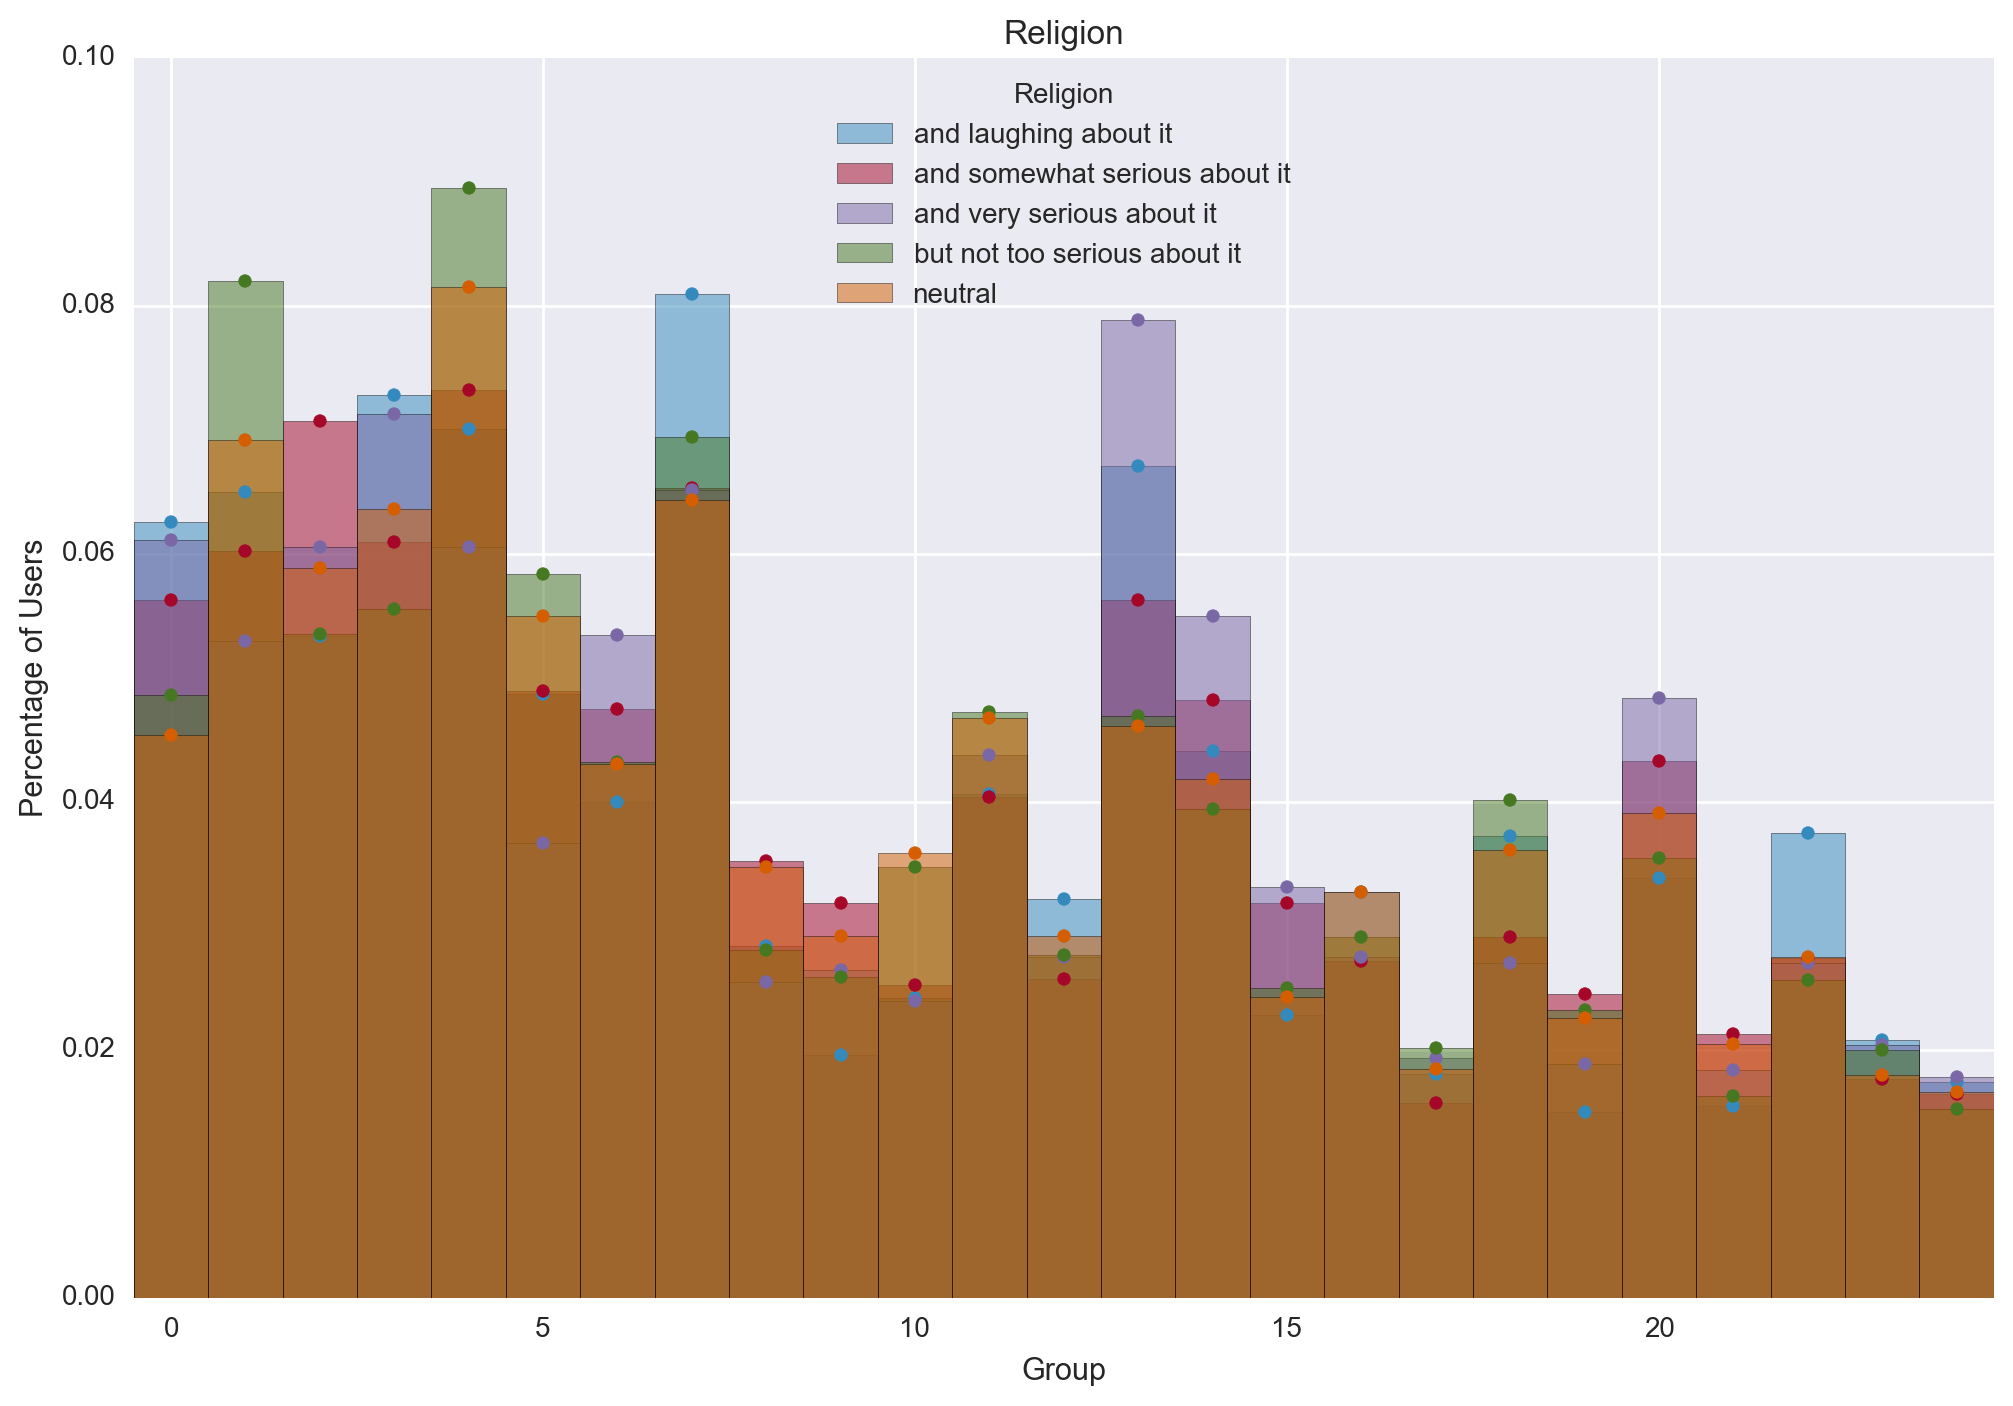

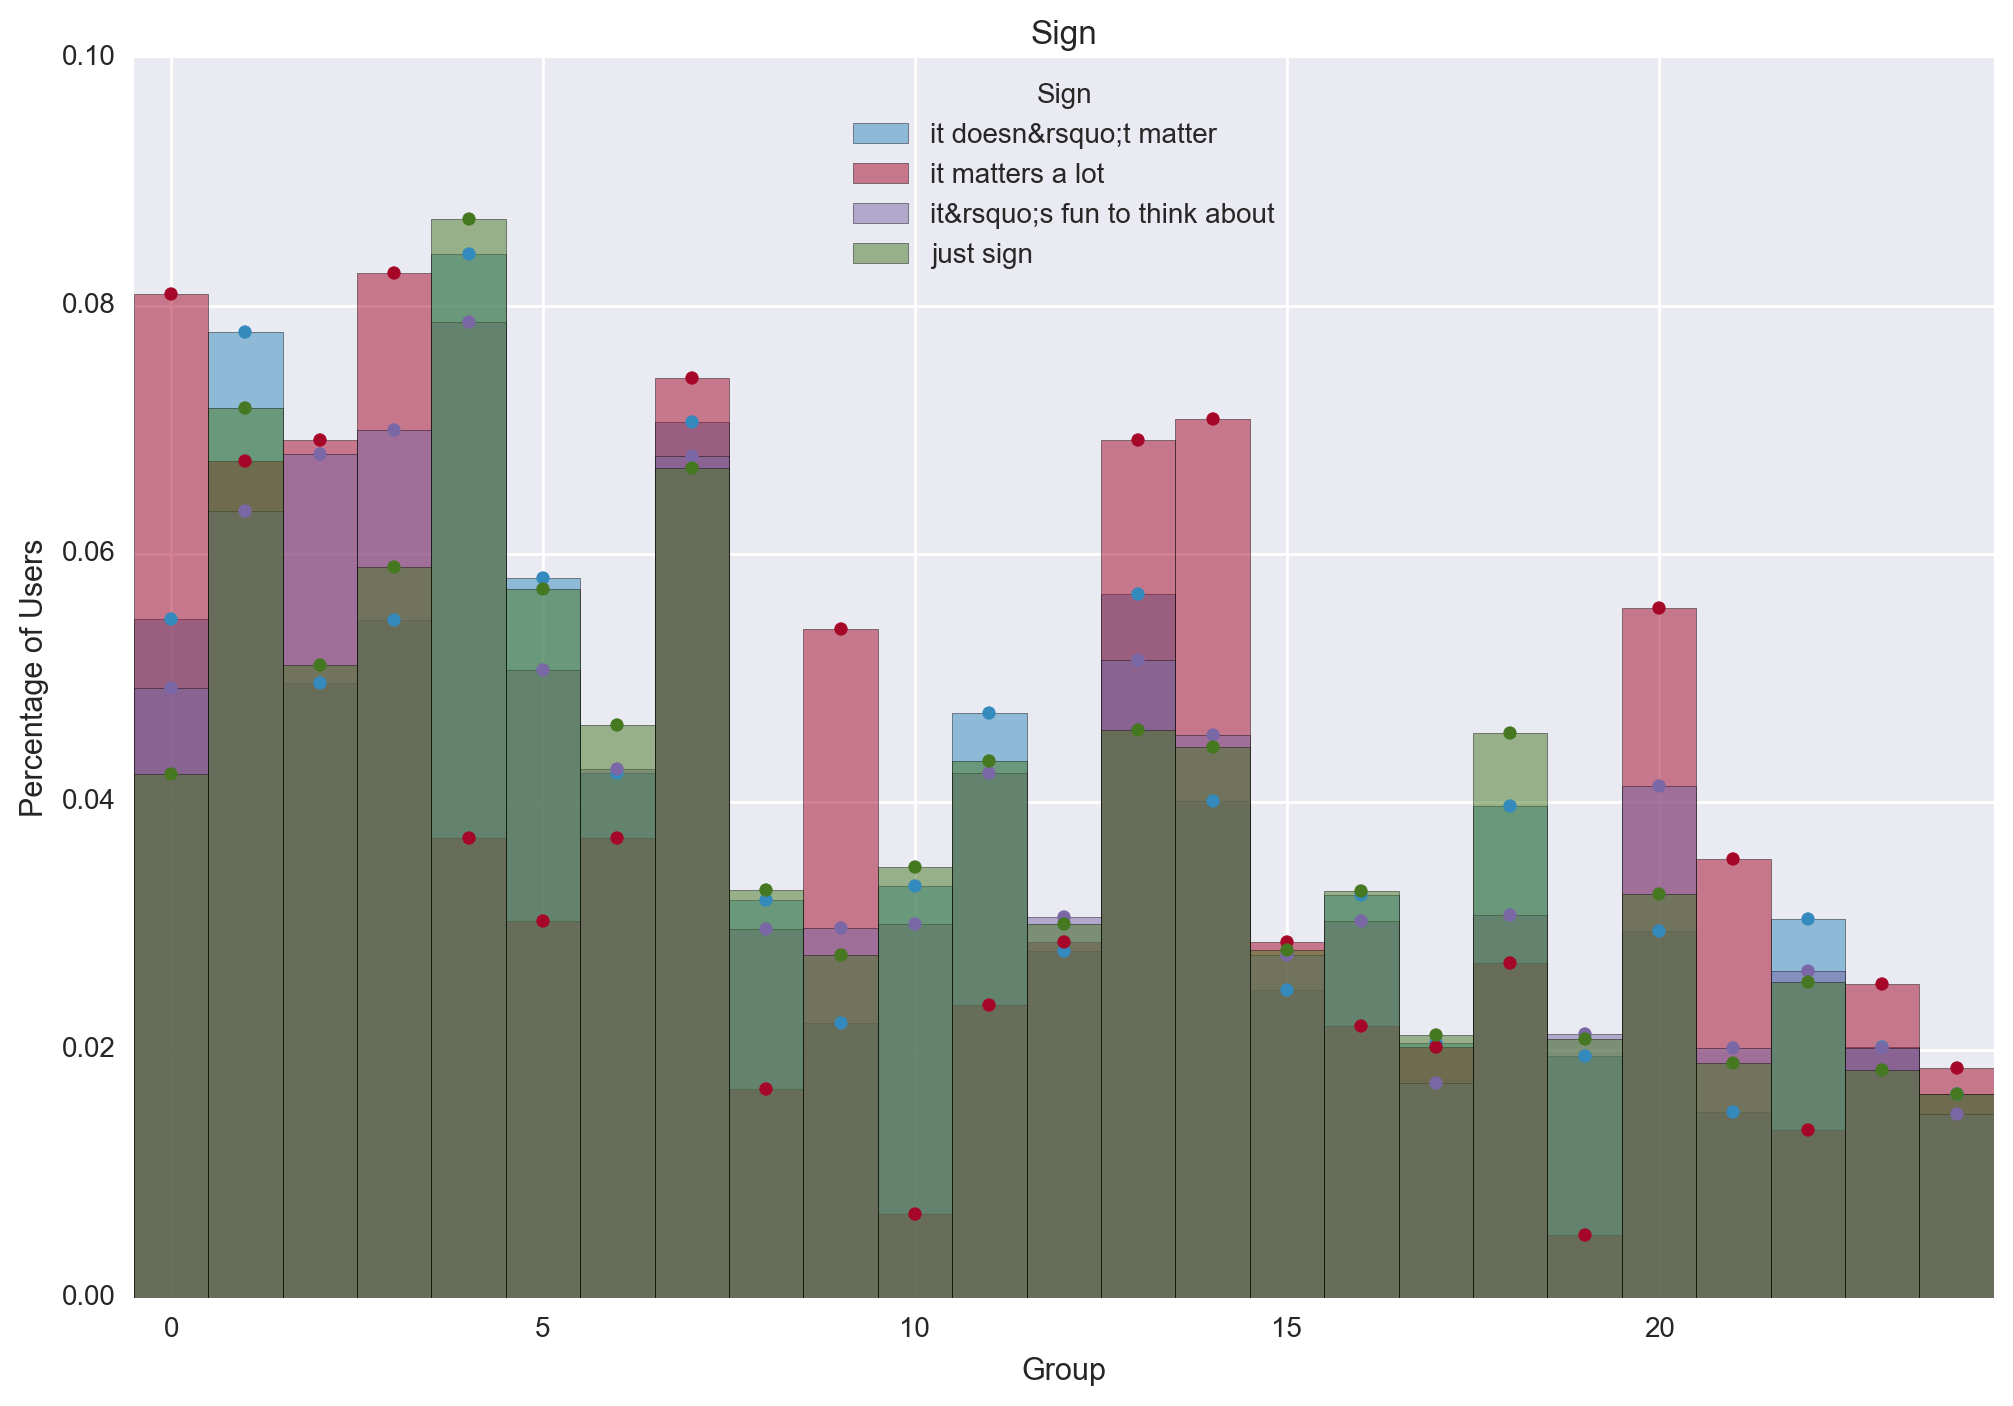

In [13]:
for demog in ['sex', 'orientation', 'drugs', 'body_type', 'religion', 'sign']:
    this = pd.DataFrame({'count' :
                         df_clean.groupby([demog, 'group'])['group'].count()}).reset_index()
    that = this.groupby(demog, as_index=False)['count'].sum()
    this = pd.merge(this, that, on=demog)
    this['pct'] = this.count_x / this.count_y

    plt.figure(figsize=(12, 8))

    for i, d in enumerate(this[demog].unique()):
        tdf = this[this[demog]==d]
        plt.bar(range(len(tdf)), tdf.pct,
                align='center',
                facecolor=colors[i], alpha=0.5,
                width=1, label=d, zorder=1)
        plt.scatter(range(len(tdf)), tdf.pct, color=colors[i], zorder=2)
    
    plt.xlim(-0.5, len(tdf)-0.5)
    plt.ylim(0)

    plt.xlabel('Group')
    plt.ylabel('Percentage of Users')

    plt.title(demog.title())
    plt.legend(title=demog.title(), loc=9)

In [15]:
df_clean['gender_orientation'] = df_clean[['orientation', 'sex']].apply(lambda x: ' '.join(x), axis=1)

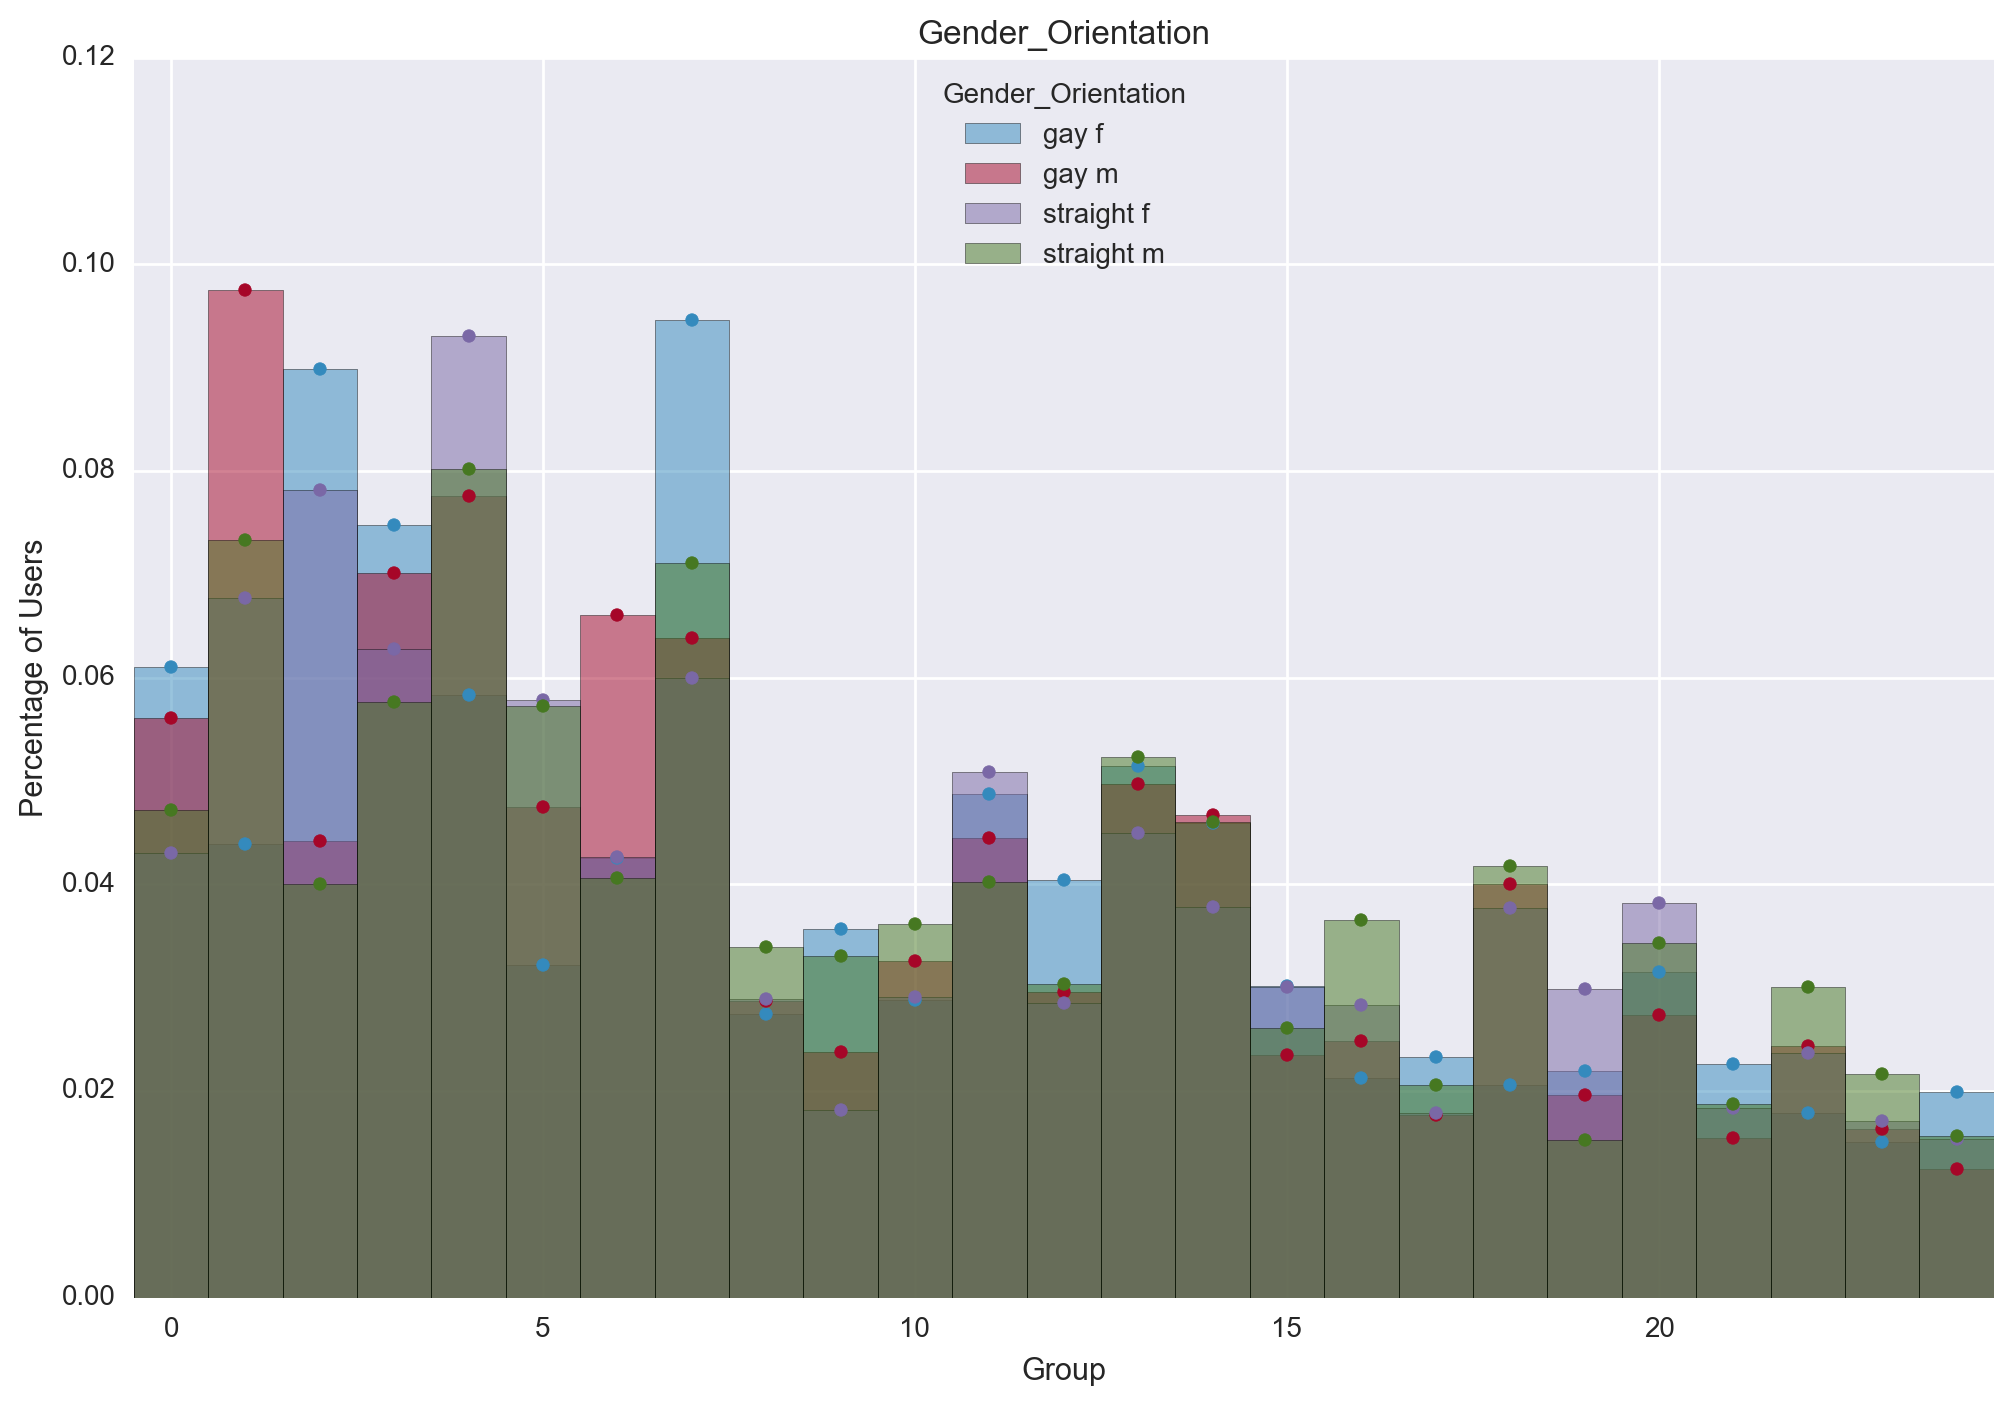

In [17]:
df_clean_simple = df_clean[df_clean.gender_orientation.isin(['straight m','straight f','gay m','gay f'])]

for demog in ['gender_orientation']:
    this = pd.DataFrame({'count' :
                         df_clean_simple.groupby([demog, 'group'])['group'].count()}).reset_index()
    that = this.groupby(demog, as_index=False)['count'].sum()
    this = pd.merge(this, that, on=demog)
    this['pct'] = this.count_x / this.count_y

    plt.figure(figsize=(12, 8))

    for i, d in enumerate(this[demog].unique()):
        tdf = this[this[demog]==d]
        plt.bar(range(len(tdf)), tdf.pct,
                align='center',
                facecolor=colors[i], alpha=0.5,
                width=1, label=d, zorder=1)
#         plt.plot(tdf.pct, color = colors[i], label = d)
        plt.scatter(range(len(tdf)), tdf.pct, color=colors[i], zorder=2)
    
    plt.xlim(-0.5, len(tdf)-0.5)
    plt.ylim(0)

    plt.xlabel('Group')
    plt.ylabel('Percentage of Users')

    plt.title(demog.title())
    plt.legend(title=demog.title(), loc=9)

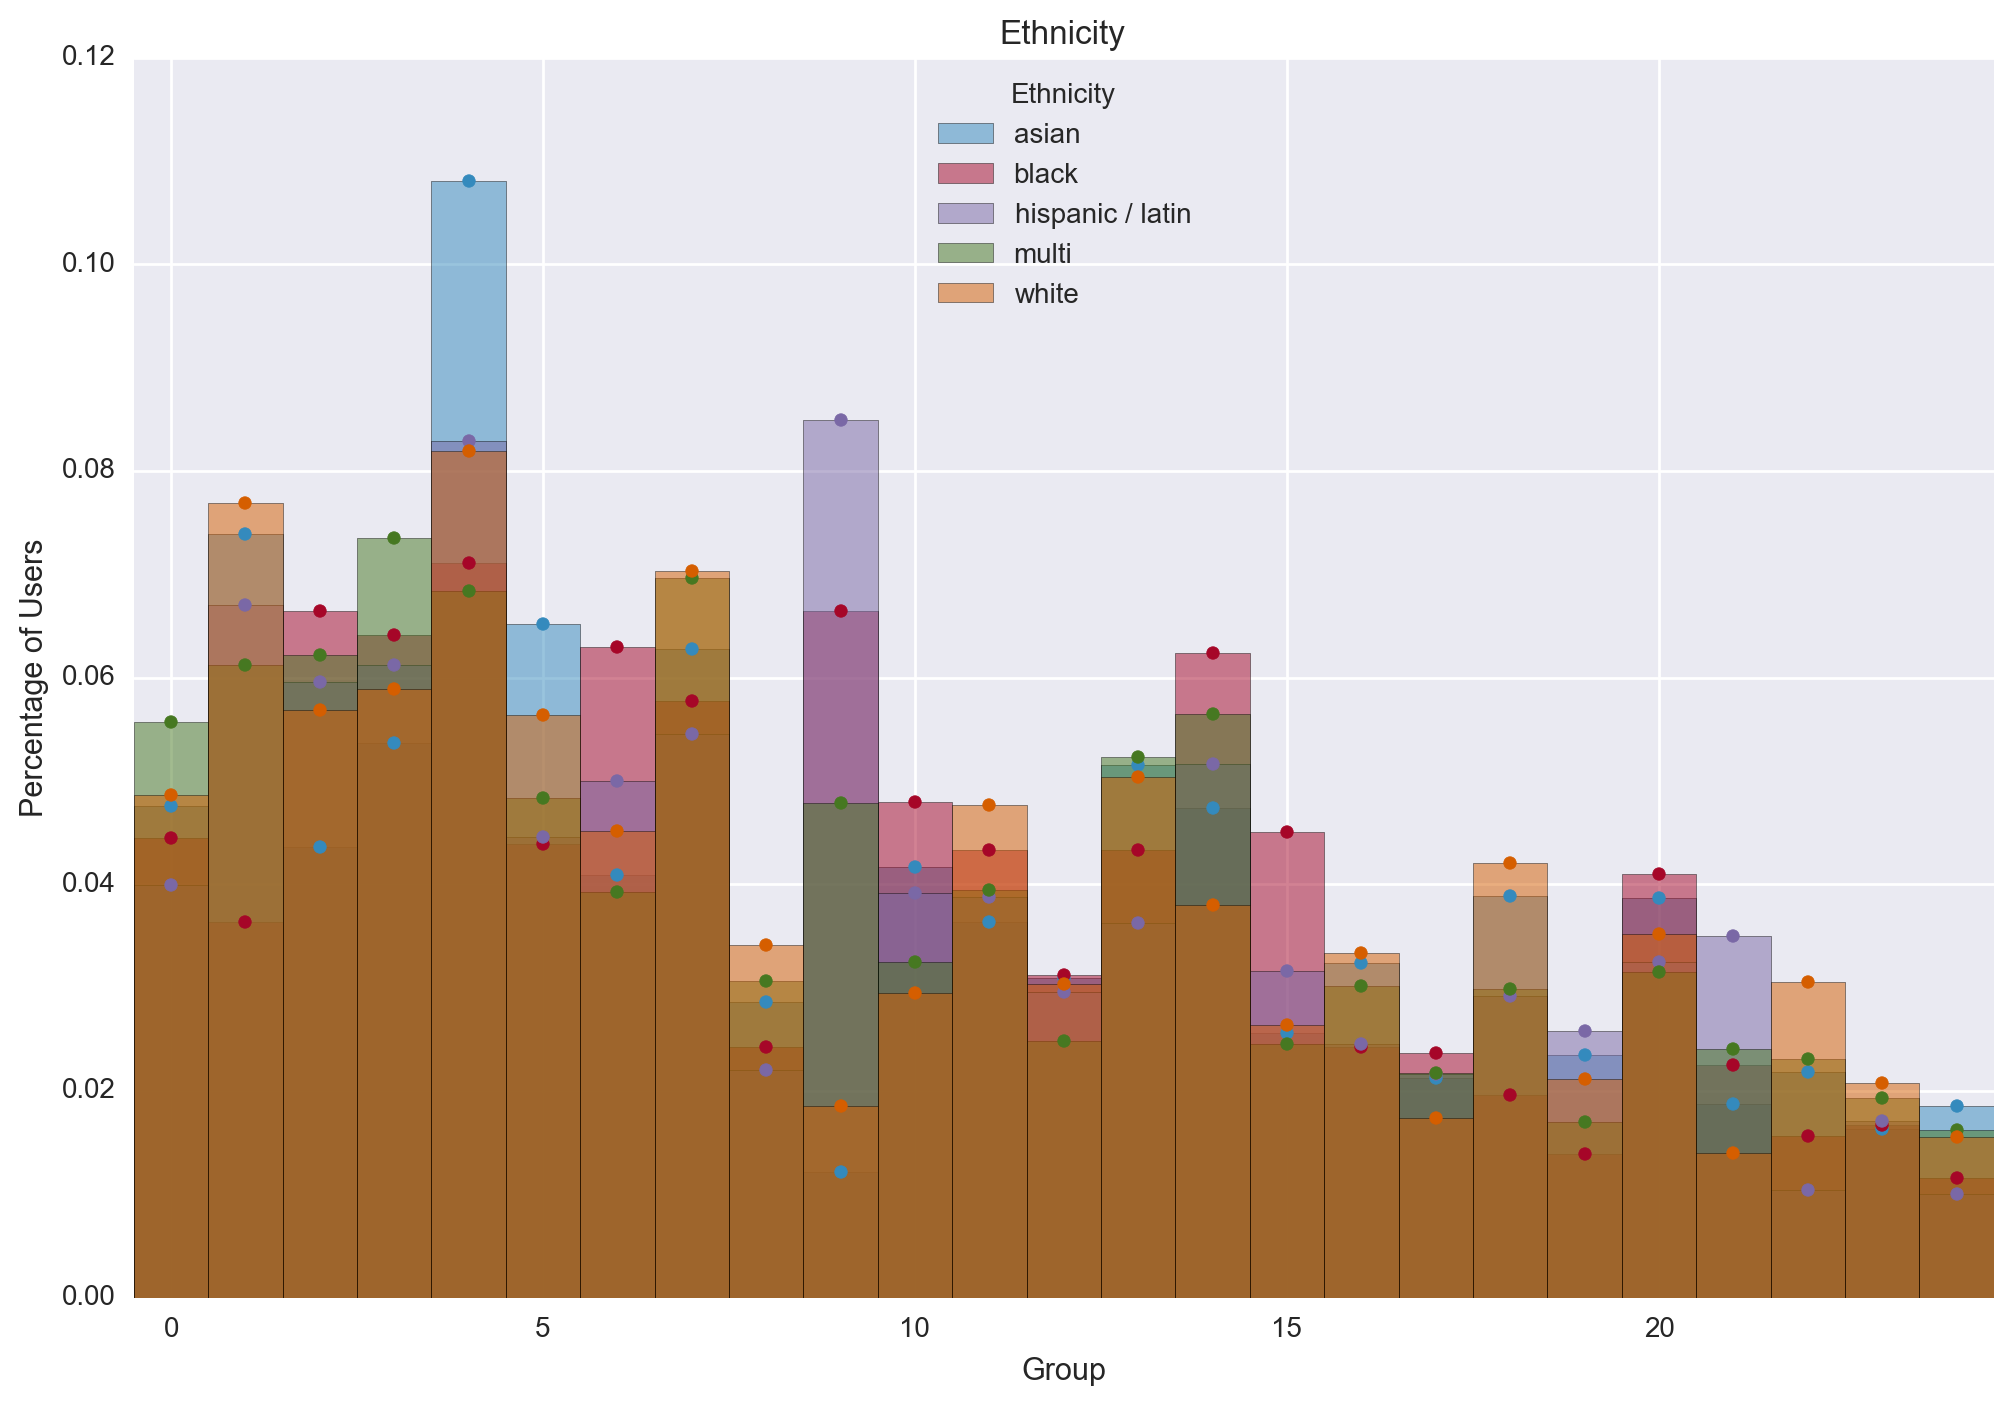

In [18]:
df_clean_simple = df_clean[df_clean.ethnicity.isin(['white','black','asian','multi','hispanic / latin'])]


for demog in ['ethnicity']:
    this = pd.DataFrame({'count' :
                         df_clean_simple.groupby([demog, 'group'])['group'].count()}).reset_index()
    that = this.groupby(demog, as_index=False)['count'].sum()
    this = pd.merge(this, that, on=demog)
    this['pct'] = this.count_x / this.count_y

    plt.figure(figsize=(12, 8))

    for i, d in enumerate(this[demog].unique()):
        tdf = this[this[demog]==d]
        plt.bar(range(len(tdf)), tdf.pct,
                align='center',
                facecolor=colors[i], alpha=0.5,
                width=1, label=d, zorder=1)
        plt.scatter(range(len(tdf)), tdf.pct, color=colors[i], zorder=2)
    
    plt.xlim(-0.5, len(tdf)-0.5)
    plt.ylim(0)

    plt.xlabel('Group')
    plt.ylabel('Percentage of Users')

    plt.title(demog.title())
    plt.legend(title=demog.title(), loc=9)

### ethnicity

In [19]:
count_h9 = count_matrix[np.array((df_clean.group==9)&(df_clean.ethnicity=='hispanic / latin')), :]
count_a9 = count_matrix[np.array((df_clean.group==9)&(df_clean.ethnicity=='asian')), :]

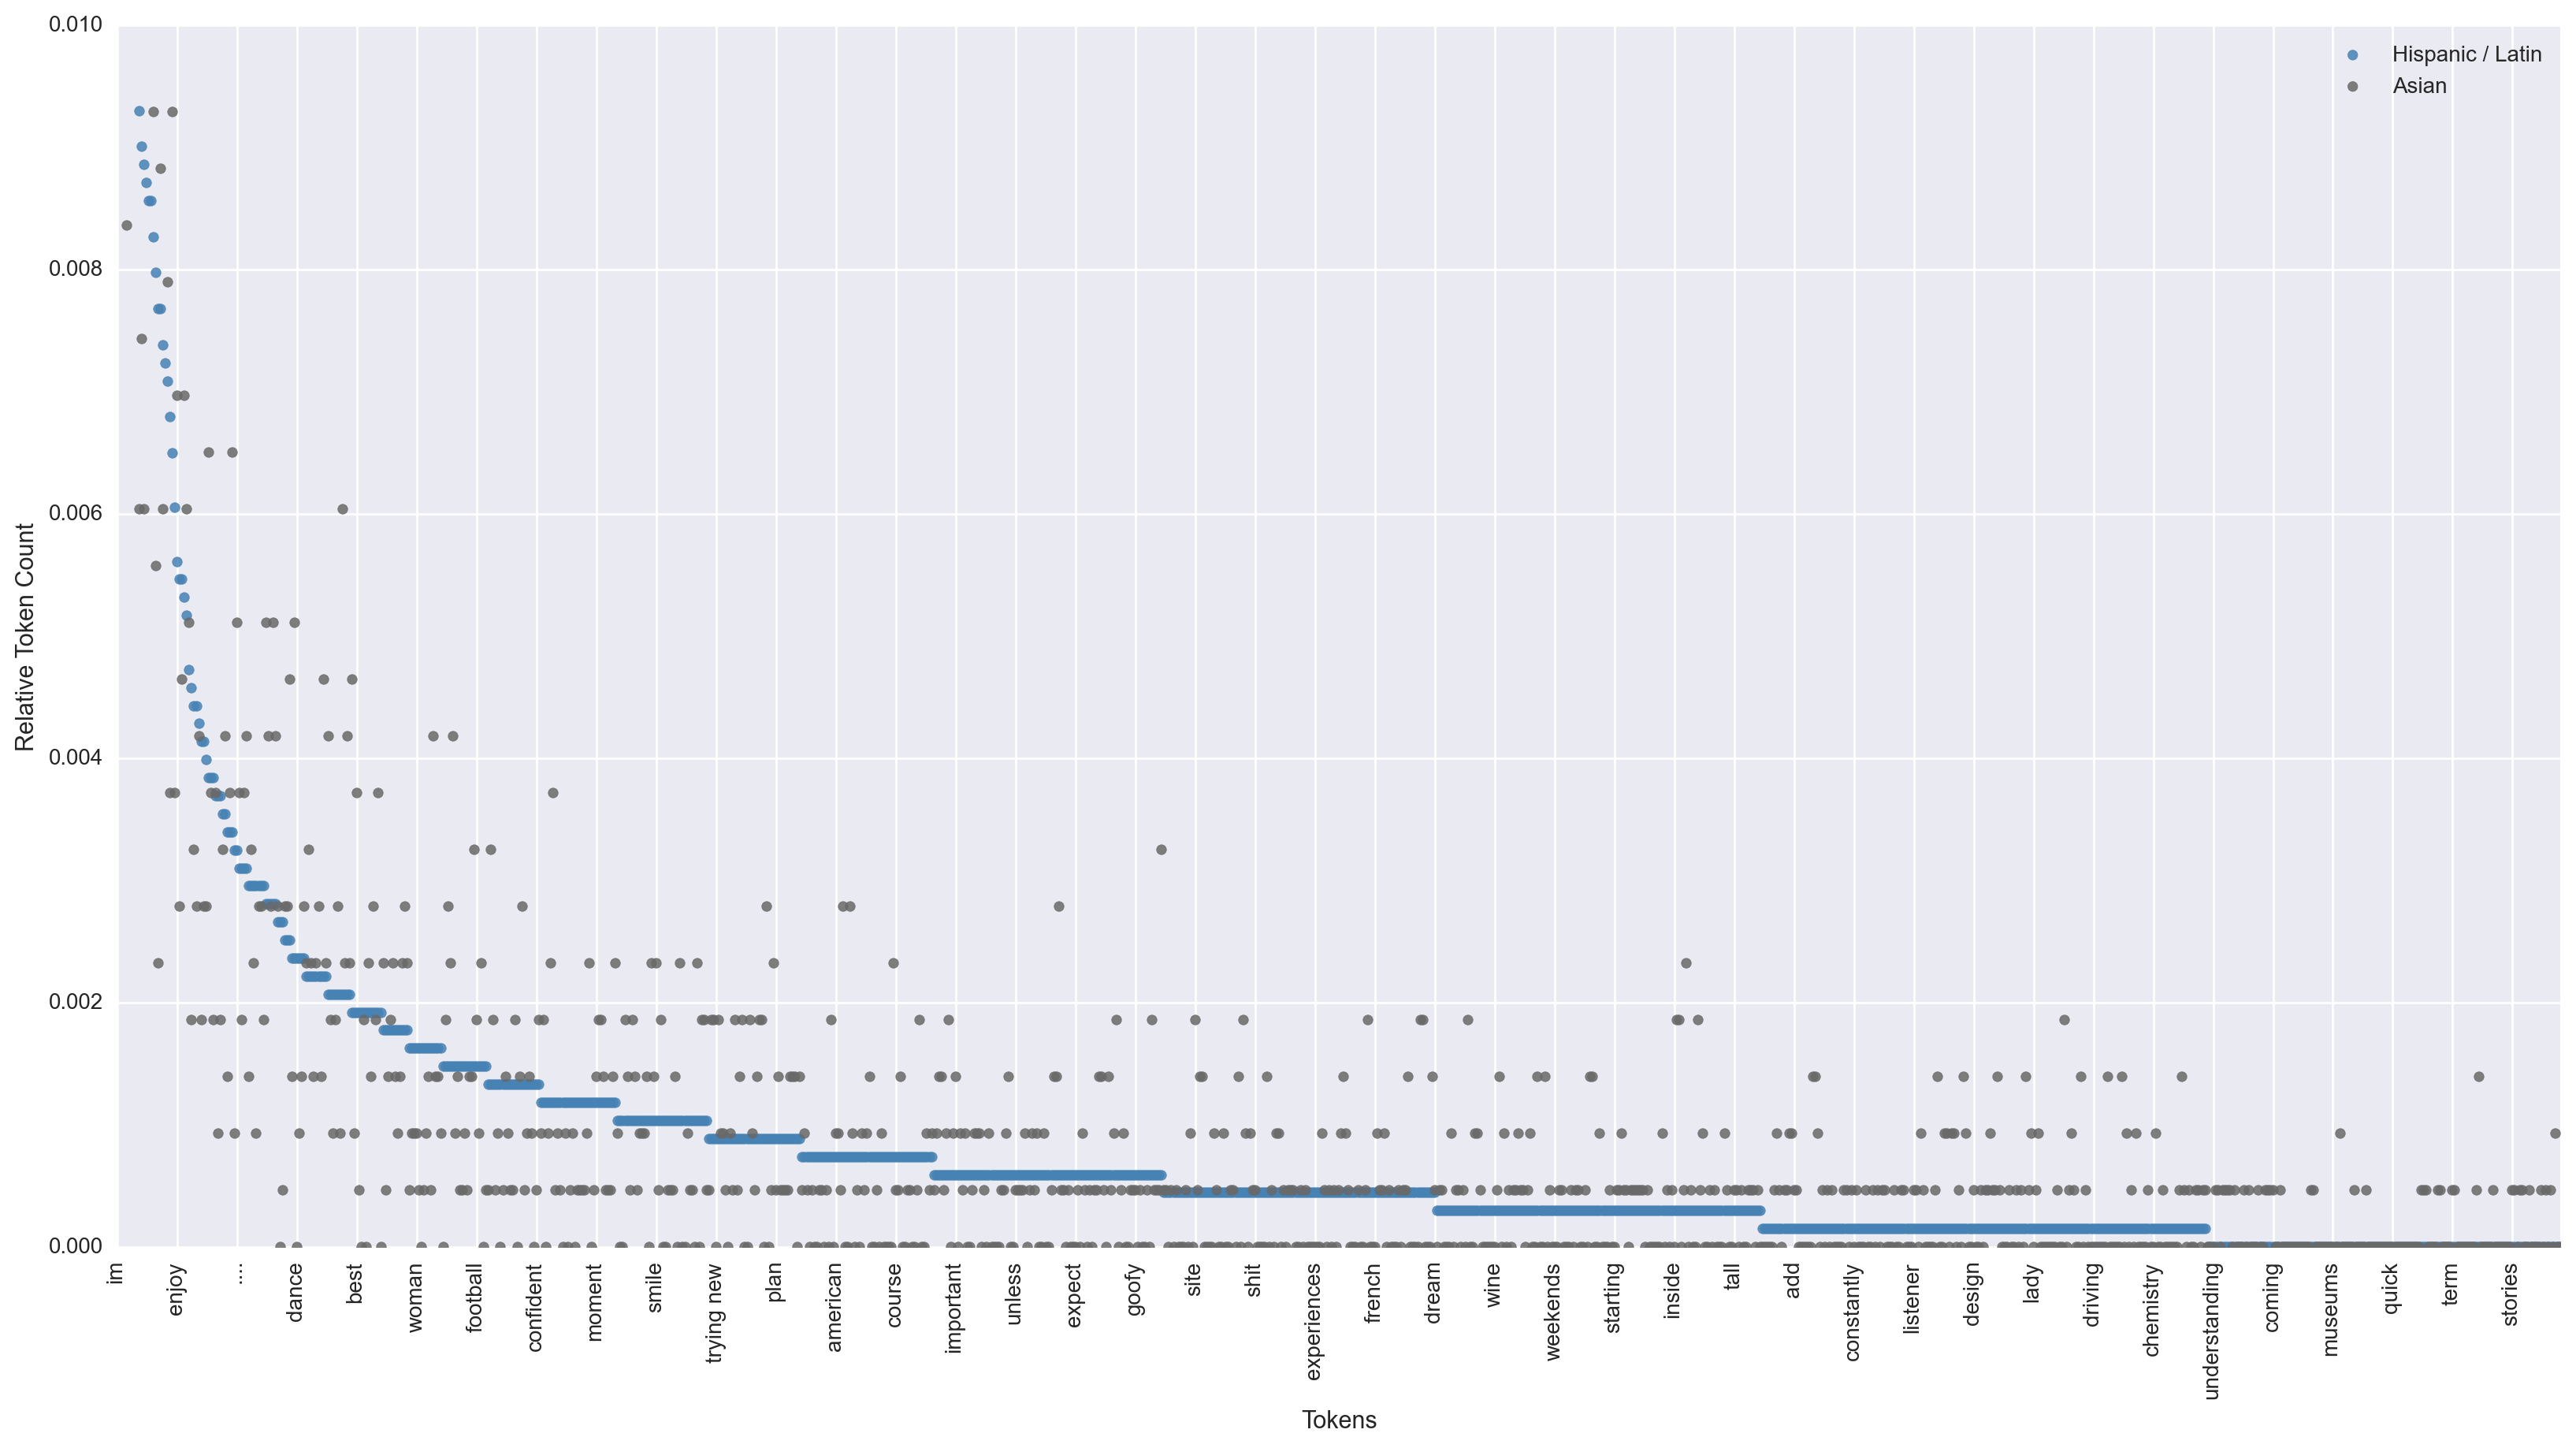

In [23]:
blah = pd.DataFrame({'h' : np.array(count_h9.sum(axis=0))[0],
                     'a' : np.array(count_a9.sum(axis=0))[0],
                     'vocab' : vocab})

blah['h'] = blah.h / blah.h.sum()
blah['a'] = blah.a / blah.a.sum()

blah.sort('h', ascending=False, inplace=True)
blah.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 10))

plt.scatter(blah.index, blah.h, alpha=0.85, color='SteelBlue', label='Hispanic / Latin')
plt.scatter(blah.index, blah.a, alpha=0.85, color='DimGray', label='Asian')

plt.xticks(blah.index[::25].tolist(), blah.vocab[::25].tolist(), rotation=90);

plt.xlabel('Tokens')
plt.ylabel('Relative Token Count')

plt.xlim(0, blah.index.max());
plt.ylim(0, 0.01)

plt.legend()

### Sex

In [15]:
count_m7 = count_matrix[np.array((df_clean.group==7)&(df_clean.sex=='m')), :]
count_f7 = count_matrix[np.array((df_clean.group==7)&(df_clean.sex=='f')), :]

In [16]:
blah = pd.DataFrame({'m' : np.array(count_m7.sum(axis=0))[0],
                     'f' : np.array(count_f7.sum(axis=0))[0],
                     'vocab' : vocab})

In [17]:
blah['f'] = blah.f / blah.f.sum()
blah['m'] = blah.m / blah.m.sum()

In [18]:
blah.sort('f', ascending=False, inplace=True)
blah.reset_index(drop=True, inplace=True)

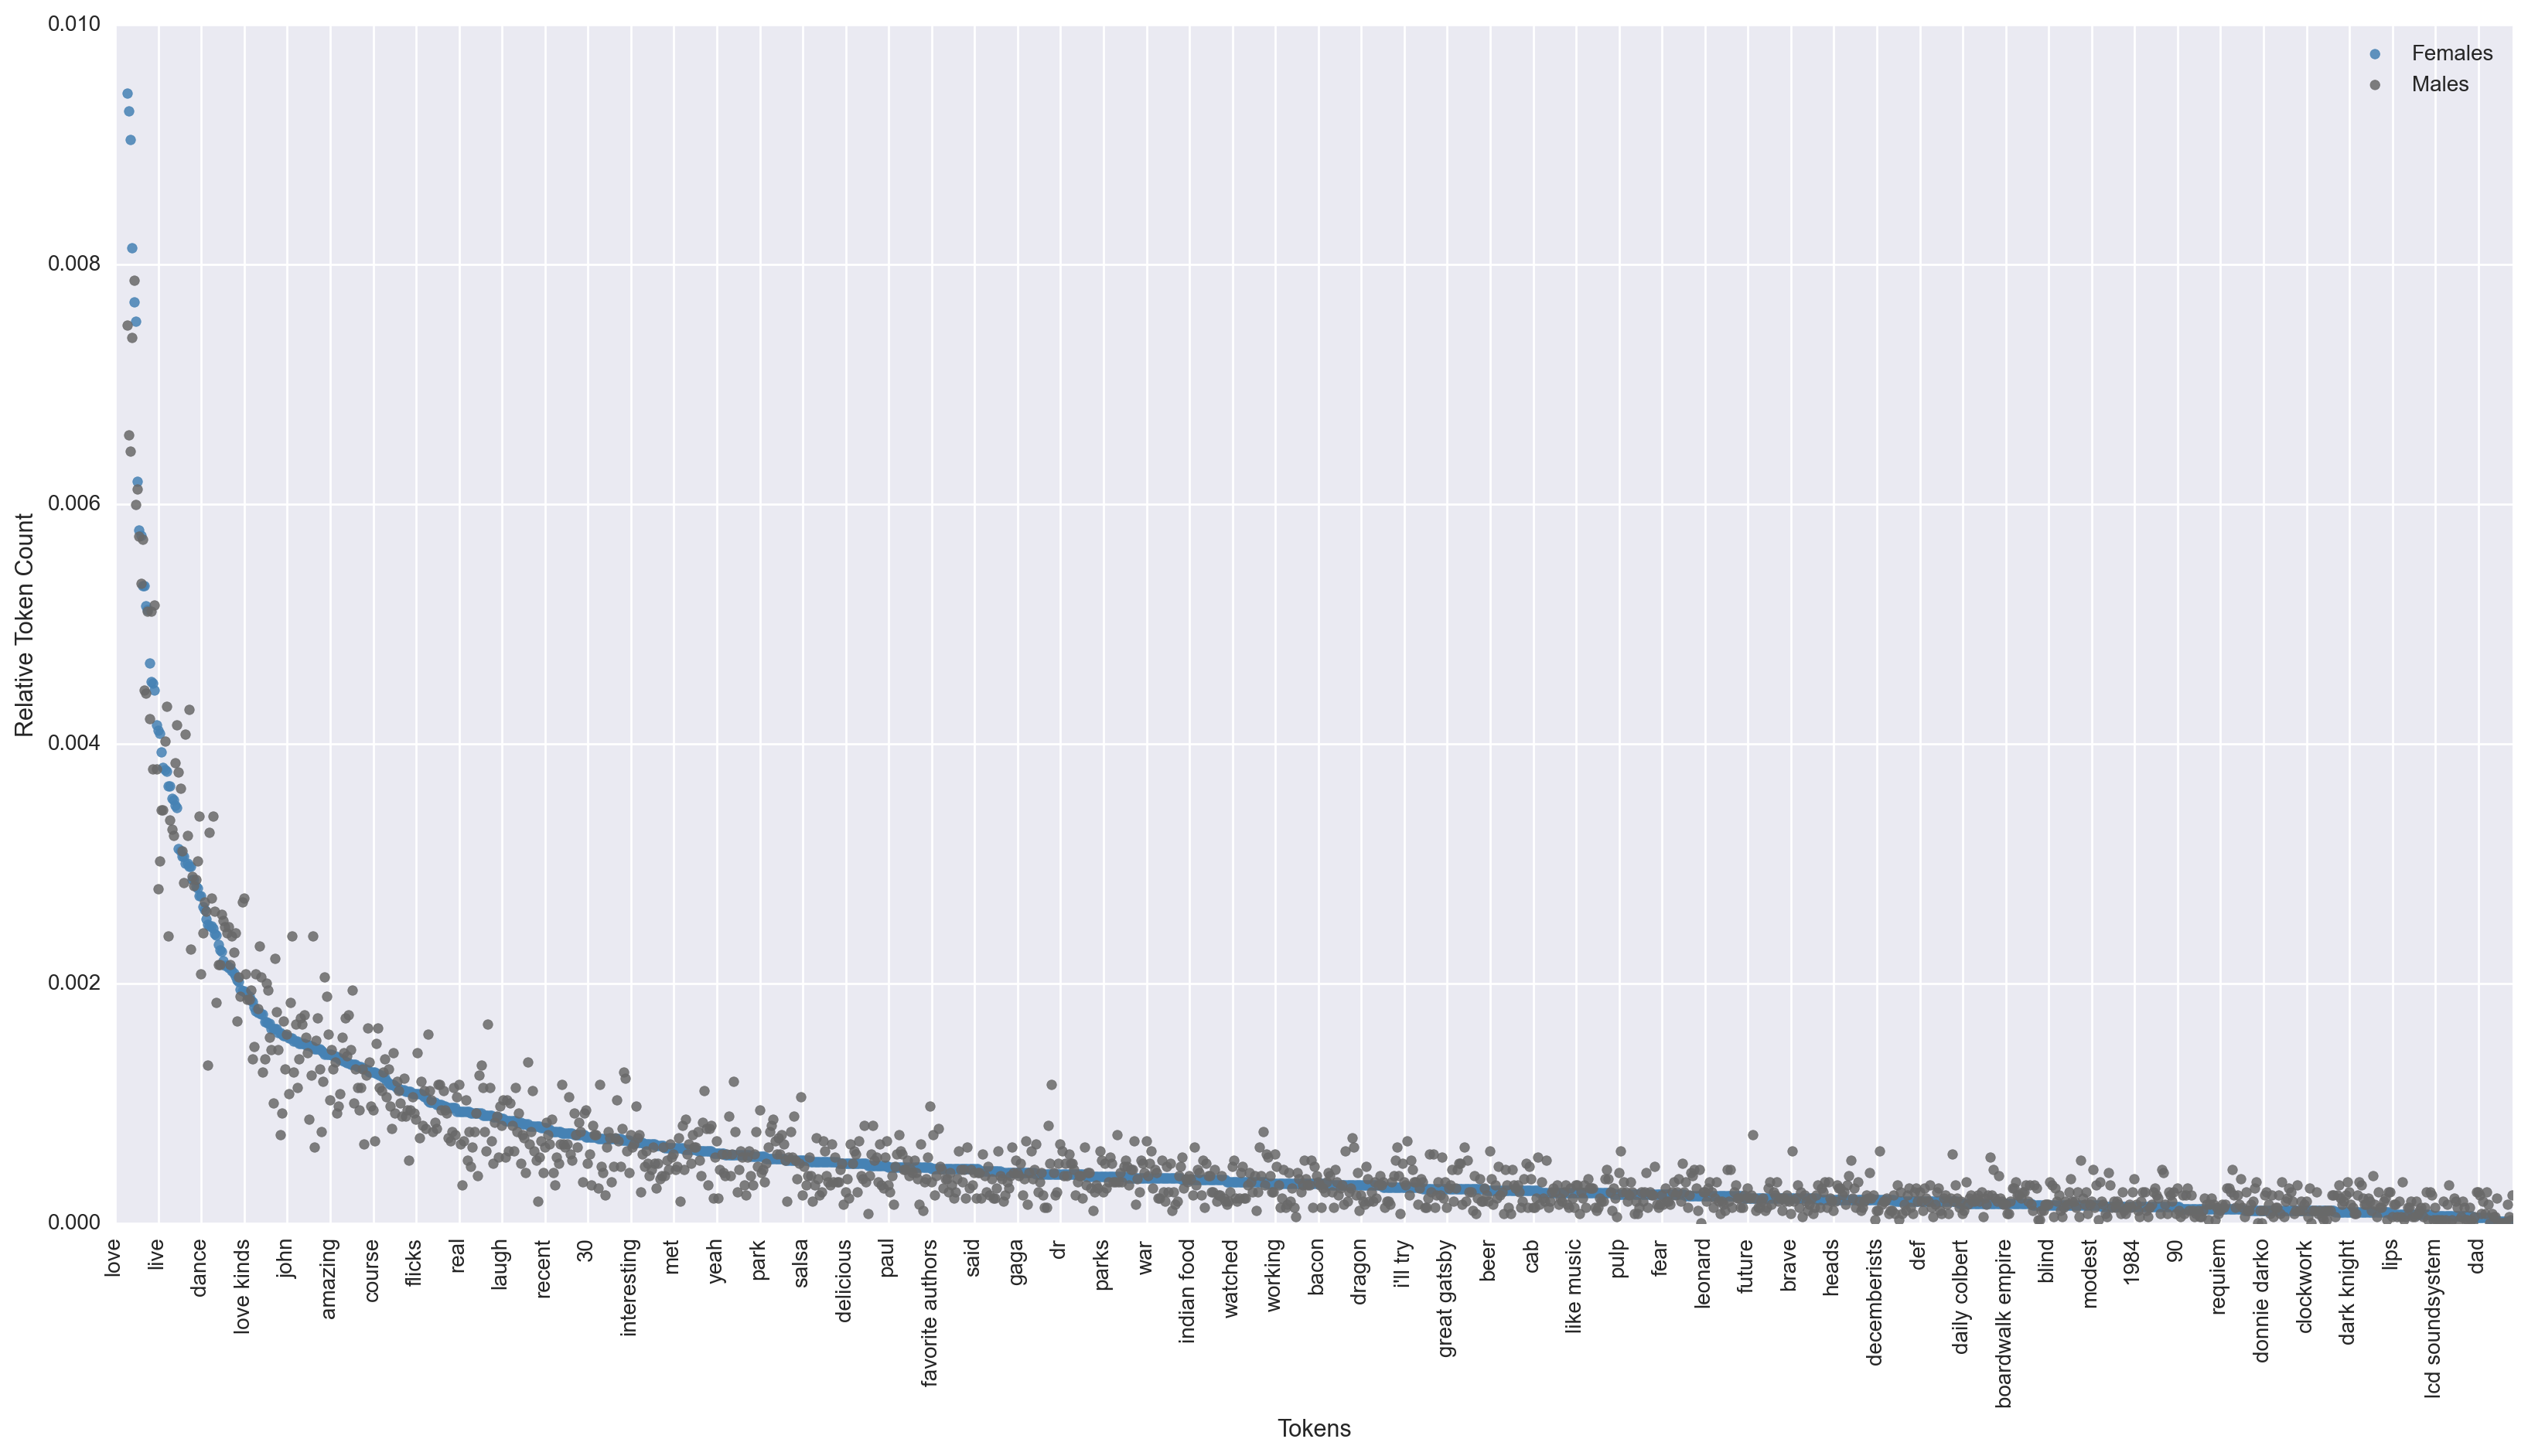

In [21]:
plt.figure(figsize=(20, 10))

plt.scatter(blah.index, blah.f, alpha=0.85, color='SteelBlue', label='Females')
plt.scatter(blah.index, blah.m, alpha=0.85, color='DimGray', label='Males')

plt.xticks(blah.index[::25].tolist(), blah.vocab[::25].tolist(), rotation=90);

plt.xlabel('Tokens')
plt.ylabel('Relative Token Count')

plt.xlim(0, blah.index.max());
plt.ylim(0, 0.01)

plt.legend()